In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Part 1: Importing Libraries and Loading the Data

In this section, we import all the required libraries and load the dataset to begin our analysis.

In [ ]:
# Load the dataset
data = pd.read_csv('Student_Performance.csv')

In [ ]:
# Display basic information about the dataset
data.info()

In [ ]:
data.head()

In [ ]:
# Check for duplicate rows
print(data.duplicated().sum())

In [ ]:
# Check for missing values
print(data.isnull().sum())

In [ ]:
print(data.dtypes)

In [ ]:
# Convert 'Performance Index' column to integer type
data['Performance Index'] = data['Performance Index'].astype('int')

# Check the updated data types
data.info()

In [ ]:
# Display descriptive statistics of the dataset
data.describe()

In [ ]:
data.head()

# Encoding Categorical Variables

In this section, we use one-hot encoding to transform the 'Extracurricular Activities' column into numerical values.


In [ ]:
# Apply one-hot encoding to 'Extracurricular Activities' column
data_encoded = pd.get_dummies(data, columns=['Extracurricular Activities'], drop_first=False)

# Convert all columns to integer type
data_encoded = data_encoded.astype(int)

# Display the first few rows of the encoded dataset
data_encoded.head()

In [ ]:
data_encoded.info()

In [ ]:
# Visualize the distribution of 'Extracurricular Activities'
sns.countplot(x='Extracurricular Activities', hue='Extracurricular Activities', data=data, palette='Set2', legend=False)
plt.title('Count of Extracurricular Activities (Yes vs No)')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Count')
plt.show()

In [ ]:
# Plot histograms for all numerical features
data.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

#  Visualizing Correlation Matrix

In this section, we create a heatmap to visualize the correlation between different features in the dataset.


In [ ]:
# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
corr_matrix

#  Analyzing Feature Correlation with Performance Index

 we sort and display the correlation of each feature with the 'Performance Index' to identify the most influential variables.


In [ ]:
# Sort and display the correlation of each feature with 'Performance Index'
print(corr_matrix['Performance Index'].sort_values(ascending=False))

In [ ]:
# Create a scatter plot to visualize the relationship between 'Previous Scores' and 'Performance Index'
sns.scatterplot(data=data, x='Previous Scores', y='Performance Index')

# Exploratory Data Analysis (EDA)
We perform data inspection
check for missing values
and explore the structure of the dataset. 
Visual tools like scatter plots, histograms, and heatmaps 
help us understand relationships between variables and identify patterns or outliers.

In [ ]:
# Separate the features and target variable
features = data_encoded.drop('Performance Index', axis=1)
target = data_encoded['Performance Index']

In [ ]:
# Initialize the scaler and scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the scaled features
scaled_features

In [ ]:
# split the dataset into training and testing sets, using 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=20)

In [ ]:
#  Selecting only the 'Previous Scores' feature (column index 1) for simple regression
X_train_simple = X_train[:, 1:2]
X_test_simple = X_test[:, 1:2]

#  Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_simple, y_train)

#  Predicting the target values for test data
y_pred = model.predict(X_test_simple)

#  Evaluation metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)             # R² score (coefficient of determination)

# Plotting the regression line along with actual data points
plt.scatter(X_test_simple, y_test, color='blue', label='Actual Data')
plt.plot(X_test_simple, y_pred, color='red', label='Regression Line')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Simple Linear Regression: Previous Scores vs Performance Index')
plt.legend()
plt.show()

#  Display evaluation metrics
print(f'R²: {r2}')
print(f'Mean Squared Error: {mse}')

# Simple Linear Regression Model

In this part, we use the simple linear regression model we previously trained to predict the Performance Index for a student who scored 80 in Previous Scores.


In [ ]:
#  Extract the feature and target
X_simple = data_encoded[['Previous Scores']].values
y = data_encoded['Performance Index'].values

#  Initialize and train the Linear Regression model
model_simple = LinearRegression()
model_simple.fit(X_simple, y)

#  Predict the Performance Index for a student with 80 previous score
X_new_simple = np.array([[80]])
predicted_performance_simple = model_simple.predict(X_new_simple)

#  Output the result
print(f"Simple Linear Regression Prediction for {X_new_simple[0][0]} Previous Scores: {predicted_performance_simple[0]:.2f}")

# Multiple Linear Regression Model

We now use Multiple Linear Regression Model to model the relationship between the Performance Index and all other features in the dataset. This allows the model to learn from multiple variables rather than just one (like in simple linear regression).


In [ ]:
#  Initialize and train the multiple linear regression model on all features
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

#  Predict values using the test set
y_pred_multi = model_multi.predict(X_test)

#  Evaluate the model using R² and Mean Squared Error
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

#  Display the evaluation metrics
print(f'Multiple Linear Regression R²: {r2_multi}')
print(f'Multiple Linear Regression Mean Squared Error: {mse_multi}')

#  Compare with simple linear regression results
print(f'\nComparison:\n')
print(f'Multiple Linear Regression R²: {r2_multi} vs Simple Linear Regression R²: {r2}')
print(f'Multiple Linear Regression MSE: {mse_multi} vs Simple Linear Regression MSE: {mse}')

Here, we are using Multiple Linear Regression to predict the Performance Index for a student based on multiple features: Hours Studied, Previous Scores, Sample Question Papers Practiced, and Sleep Hours.



In [ ]:
# Extract the features (independent variables) and target (dependent variable)
X_multiple = data_encoded[['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced', 'Sleep Hours']].values  # Features
y = data_encoded['Performance Index'].values  # Target

#  Initialize and train the Multiple Linear Regression model
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

#  Predict the Performance Index for a new data point (6.5 hours studied, 80 previous score, 5 papers practiced, 5 sleep hours)
X_new_multiple = np.array([[6.5, 80, 5, 5]])
predicted_performance_multiple = model_multiple.predict(X_new_multiple)

#  Display the prediction
print(f"Multiple Linear Regression Prediction for the new data point: {predicted_performance_multiple[0]:.2f}")

# Polynomial Regression
In this part, we explore Polynomial Regression for different polynomial degrees (2, 3, 4).
By increasing the degree, we can fit more complex curves to the data and see how the model's performance changes.

In [ ]:
#  Extract the feature and target variables
X = data_encoded[['Previous Scores']]  # Independent variable
y = data_encoded['Performance Index']  # Dependent variable

#  Try Polynomial Regression for different degrees
degrees = [2, 3, 4]

for degree in degrees:
    #  Transform the feature to a higher degree polynomial
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    #  Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    #  Predict using the trained model
    y_pred = model.predict(X_poly)

    #  Calculate Mean Squared Error and R² score
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    #  Display the results for each degree
    print(f"Degree {degree}:\n MSE = {mse:.6f}\n R² = {r2:.6f}")

    #  Visualize the Polynomial Regression for each degree
    plt.figure(figsize=(70, 10))
    plt.scatter(X, y, color='blue', label='Original data')
    plt.plot(X, y_pred, color='red', label=f'Poly Degree {degree}')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Previous Scores')
    plt.ylabel('Performance Index')
    plt.legend()
    plt.grid(True)
    plt.show()

    print('='*60)

In [ ]:
#  New data point for prediction
X_new = 80  # The new value of Previous Scores

#  Polynomial transformation for degree 4
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(data_encoded[['Previous Scores']].values)

#  Train the model with Polynomial Regression (degree 4)
model = LinearRegression()
model.fit(X_poly, data_encoded['Performance Index'].values)

#  Transform the new value using the same polynomial transformation
X_new_poly = poly.transform([[X_new]])

#  Predict the Performance Index for the new value
predicted_performance = model.predict(X_new_poly)

#  Display the predicted value
print(f"Predicted Performance Index for {X_new} Previous Scores: {predicted_performance[0]:.2f}")

# Summary of Findings:

### 1. Data Preprocessing:
The data was read from the CSV file and cleaned by checking for missing values and duplicates.

 Categorical variables like "Extracurricular Activities" were encoded into numeric form for model compatibility.

 Scaling was applied to features to ensure uniformity in data range, specifically for models sensitive to feature scales like linear regression.

### 2. Exploratory Data Analysis (EDA):
We explored the relationship between various features and the target variable ("Performance Index") using:

 Correlation matrix to understand feature dependencies.

 Scatter plots to visually inspect relationships, especially between "Previous Scores" and "Performance Index".

### 3. Simple Linear Regression:
A simple linear regression model was trained using Previous Scores to predict the Performance Index.

 The performance was evaluated using Mean Squared Error (MSE) and R² score.
### 4. Multiple Linear Regression:
A multiple linear regression model was trained using multiple features to predict the Performance Index.

 Comparison of R² and MSE was made with the simple linear regression model to evaluate improvement by including more features.
### 5. Polynomial Regression:
Polynomial regression of varying degrees (2, 3, and 4) was applied to Previous Scores to improve prediction accuracy.

 For each degree, the Mean Squared Error (MSE) and R² scores were calculated to evaluate the fit of the model.
### 6. Final Prediction Using Polynomial Regression:
After training the polynomial regression model with degree 4, a prediction was made for 80 previous scores to forecast the Performance Index.

This workflow shows a comprehensive approach to modeling student performance, with evaluations of different regression techniques and their effectiveness in predicting outcomes.



In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler  # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
filepath= r'Bone Tumor Dataset.csv'
df = pd.read_csv(filepath)
df.columns = df.columns.str.strip() # remove space in name of colomns to defined them easily
df.info()
print('='*60)
df = df.dropna()
df.info()
print('='*60) # same num of rows so there is no  na
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient ID            500 non-null    object
 1   Sex                   500 non-null    object
 2   Age                   500 non-null    int64 
 3   Grade                 500 non-null    object
 4   Histological type     500 non-null    object
 5   MSKCC type            500 non-null    object
 6   Site of primary STS   500 non-null    object
 7   Status (NED, AWD, D)  500 non-null    object
 8   Treatment             500 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient ID            500 non-null    object
 1   Sex                   500 non-null  

In [91]:
df_encoded = df.copy()  # take a copy to work on it without changing the main data
label_encoder = LabelEncoder()
df_encoded ['Sex'] = label_encoder.fit_transform(df_encoded ['Sex'])  # male 1 female 0  (LabelEncoding)

df_encoded ['Status'] = label_encoder.fit_transform(df_encoded ['Status (NED, AWD, D)']) ## the target  NED 0 , AWD 1 , D 2   (LabelEncoding)

grade_mapping = {'High': 2, 'Intermediate': 1, 'Low': 0} # (Ordinal Encoding)  add new colomn like the main colomn but in numeric
df_encoded ['Grade'] = df_encoded ['Grade'].map(grade_mapping)

df_encoded = pd.get_dummies(df_encoded, columns=['Histological type', 'MSKCC type', 'Site of primary STS','Treatment'], drop_first=True) # (One-Hot Encoding) with remove the main colomns after separate

bool_cols = df_encoded.select_dtypes(include="bool").columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)    # changing true / false to   1/0

print(df_encoded.info()) # detect that all features become numeric after encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 28 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Patient ID                                                    500 non-null    object
 1   Sex                                                           500 non-null    int64 
 2   Age                                                           500 non-null    int64 
 3   Grade                                                         500 non-null    int64 
 4   Status (NED, AWD, D)                                          500 non-null    object
 5   Status                                                        500 non-null    int64 
 6   Histological type_leiomyosarcoma                              500 non-null    int64 
 7   Histological type_malignant solitary fibrous tumor            500 non-null    in

In [92]:
X = df_encoded.drop(columns=['Status (NED, AWD, D)','Patient ID','Status'])  # all features except target and unimportant colomns
y = df_encoded['Status']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # 80% for train 20% for test

# standrization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # standrization of training data
X_test_scaled = scaler.transform(X_test)  #  standrization of test data
# model for logistic regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)  # train model

y_pred = model.predict(X_test_scaled)

Confusion Matrix:
[[16  1  1]
 [ 1 18 12]
 [ 4  7 40]]


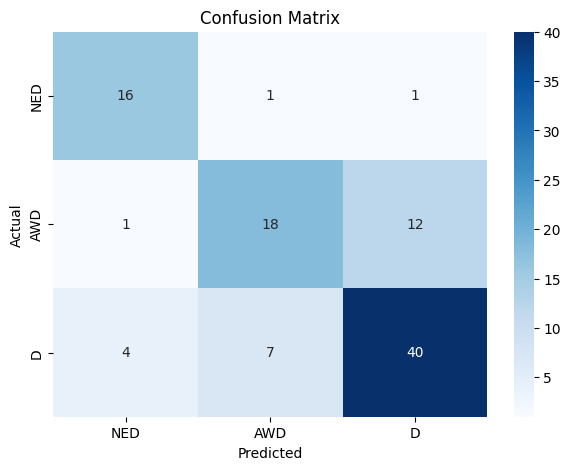

In [93]:
# visualization

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NED', 'AWD', 'D'], yticklabels=['NED', 'AWD', 'D'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [94]:
# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.69      0.58      0.63        31
           2       0.75      0.78      0.77        51

    accuracy                           0.74       100
   macro avg       0.74      0.75      0.74       100
weighted avg       0.74      0.74      0.74       100



# Summary of Findings:


# Dataset and Preprocessing:

Label Encoding: gender and Status columns were encoded to numeric values.

Ordinal Encoding: The Grade column was converted to numerical values.

One-Hot Encoding: Categorical features like Histological type and Treatment were one-hot encoded.

Standardization: Features were standardized using StandardScaler.


# Model:

Logistic Regression was used for classification after splitting the data into training (80%) and testing (20%) sets.

The model was evaluated with a confusion matrix and classification report.

# Results:

Accuracy: 74%

Precision: The model is most accurate for class 0 (NED), but struggles with class 1 (AWD).

Recall: Class 1 (AWD) had the lowest recall (0.58), indicating some misclassifications in this group.

In summary, the model performs fairly well but could benefit from further optimization, especially for predicting the AWD class.